In [17]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.fftpack import fft, ifft, fftshift

In [18]:
# # Исходные данные
# U_0 = 1.2
# f_s = 485e3
# m = 0.5
# F_m = 12e3
# f_p = 100e3


# #Cерега
# U_0 = 1.3
# f_s = 540e3
# m = 0.5
# F_m = 9e3
# f_p = 100e3

U_0 = 1
f_s = 475e3
m = 0.4
F_m = 13e3
f_p = 100e3


# Супергетеродин
f_g_v = f_p + f_s
f_g_n = f_s - f_p
Delta_f_AM = 2 * F_m
P_kFT = 1.5 * Delta_f_AM

f_0 = f_p
L_kFT_sup = 1.5e-3
C_kFT_sup = 1 / (L_kFT_sup * (2 * np.pi * f_0) ** 2)
R_kFT_sup = 1 / (2 * np.pi * P_kFT * C_kFT_sup)
K_ITUN_sup = 1 / R_kFT_sup

# Инфрадин
f_p_inf = f_s + f_g_v
f_0 = f_p_inf

L_kFT_inf = 150e-6
C_kFT_inf = 1 / (L_kFT_inf * (2 * np.pi * f_0) ** 2)
R_kFT_inf = 1 / (2 * np.pi * P_kFT * C_kFT_inf)
K_ITUN_inf = 1 / R_kFT_inf

# Гомодин
f_v_FNH = 6 * F_m
R_FNH_gom = 3e3
C_FNH_gom = 1 / (2 * np.pi * f_v_FNH * R_FNH_gom)

# Вывод результатов
variables = [
    ('fгв', f_g_v),
    ('fгн', f_g_n),
    ('Ширина спектра', Delta_f_AM),
    ('Полоса пропускания колебательного контура', P_kFT),
    ('Индуктивность катушки', L_kFT_sup),
    ('Ёмкость конденсатора', C_kFT_sup),
    ('Резонансное сопротивление колебательного контура', R_kFT_sup),
    ('Коэф. передачи ИТУН', K_ITUN_sup),
    ('fп.инф', f_p_inf),
    ('Ёмкость конденсатора инф.', C_kFT_inf),
    ('Резонансное сопротивление колебательного контура инф.', R_kFT_inf),
    ('Коэф. передачи ИТУН инф.', K_ITUN_inf),
    ('Верхняя граничная частота интегрирующей RC - цепи', f_v_FNH),
    ('Ёмкость конденсатор RC цепи', C_FNH_gom)
]

for name, value in variables:
    print(f"{name} = {value:.6g}")  # Форматирование для удобного отображения

fгв = 575000
fгн = 375000
Ширина спектра = 26000
Полоса пропускания колебательного контура = 39000
Индуктивность катушки = 0.0015
Ёмкость конденсатора = 1.68869e-09
Резонансное сопротивление колебательного контура = 2416.61
Коэф. передачи ИТУН = 0.000413803
fп.инф = 1.05e+06
Ёмкость конденсатора инф. = 1.53169e-10
Резонансное сопротивление колебательного контура инф. = 26643.1
Коэф. передачи ИТУН инф. = 3.75331e-05
Верхняя граничная частота интегрирующей RC - цепи = 78000
Ёмкость конденсатор RC цепи = 6.80149e-10


### Расчёт спектра на входе и выходе перемножителя

Амплитуда несущей: 1 В
Амплитуда боковых составляющих: 0.2 В
Нижняя боковая частота: 462.0 кГц
Верхняя боковая частота: 488.0 кГц
Ширина спектра: 26.0 кГц


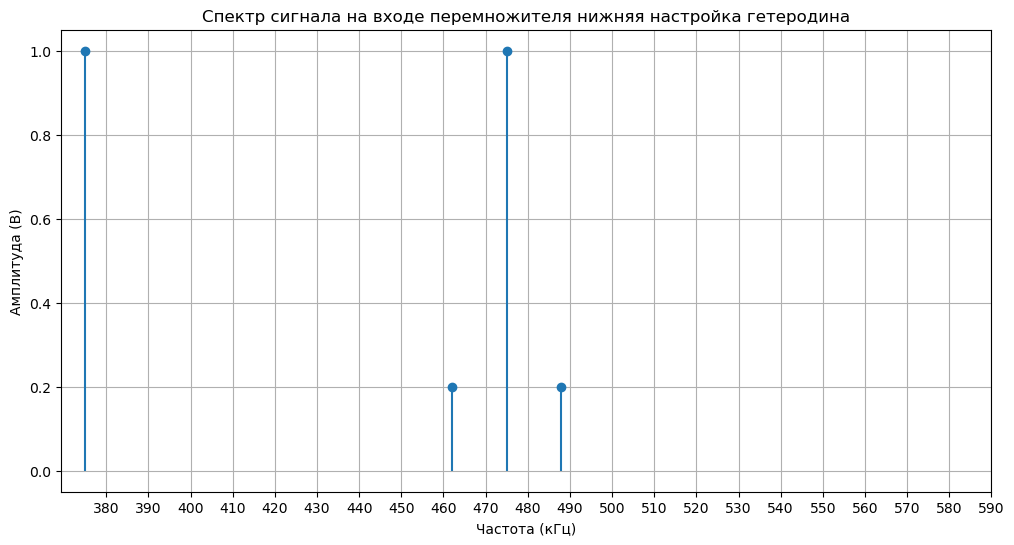

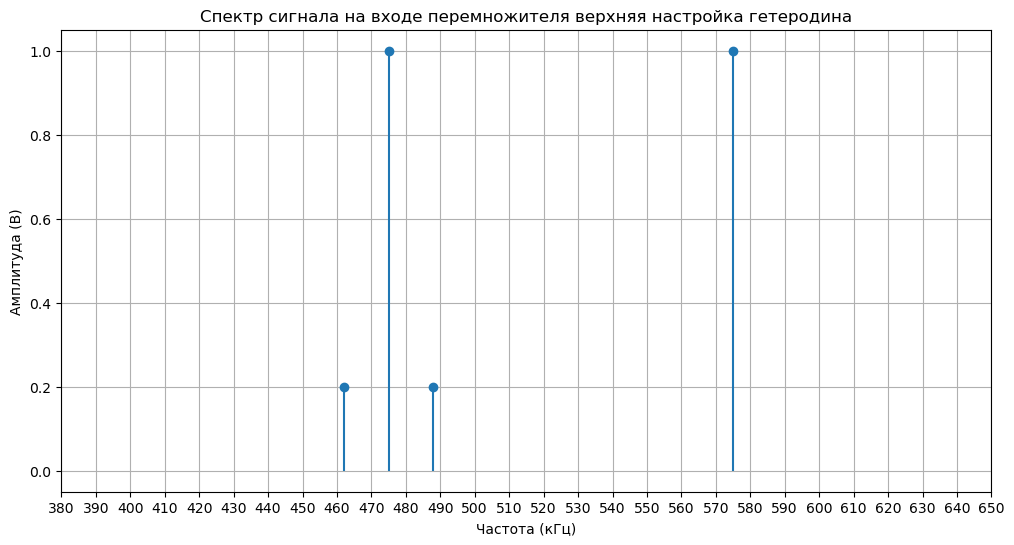

In [19]:
# # Заданные параметры
# U_0 = 1.2
# f_s = 485e3
# m = 0.5
# F_m = 12e3
# f_p = 100e3 # промежуточная частота супергетеродинного радиоприёмника

# #Cерега
# U_0 = 1.3
# f_s = 540e3
# m = 0.5
# F_m = 9e3
# f_p = 100e3

U_0 = 1
f_s = 475e3
m = 0.4
F_m = 13e3
f_p = 100e3

Ampl = 1

# Параметры спектра
carrier_amplitude = U_0  # Амплитуда несущей
sideband_amplitude = m * U_0 / 2  # Амплитуда боковых составляющих
lower_sideband_freq = f_s - F_m  # Нижняя боковая частота
upper_sideband_freq = f_s + F_m  # Верхняя боковая частота
spectrum_width = 2 * F_m  # Ширина спектра

# Вывод параметров
print(f"Амплитуда несущей: {carrier_amplitude} В")
print(f"Амплитуда боковых составляющих: {sideband_amplitude} В")
print(f"Нижняя боковая частота: {lower_sideband_freq / 1e3} кГц")
print(f"Верхняя боковая частота: {upper_sideband_freq / 1e3} кГц")
print(f"Ширина спектра: {spectrum_width / 1e3} кГц")

# Построение спектра
frequencies = [lower_sideband_freq, f_s, upper_sideband_freq, f_g_n]
amplitudes = [sideband_amplitude, carrier_amplitude, sideband_amplitude, Ampl]

plt.figure(figsize=(12, 6))

new_xticks_1 = np.arange(380, 600, 10)
new_xticks_2 = np.arange(380, 660, 10)

plt.stem([f / 1e3 for f in frequencies], amplitudes, basefmt=" ")
plt.title("Спектр сигнала на входе перемножителя нижняя настройка гетеродина")
plt.xlabel("Частота (кГц)")
plt.ylabel("Амплитуда (В)")
plt.grid(True)
plt.xticks(new_xticks_1)
plt.show()

frequencies = [lower_sideband_freq, f_s, upper_sideband_freq, f_g_v]
amplitudes = [sideband_amplitude, carrier_amplitude, sideband_amplitude, Ampl]

plt.figure(figsize=(12, 6))

plt.stem([f / 1e3 for f in frequencies], amplitudes, basefmt=" ")
plt.title("Спектр сигнала на входе перемножителя верхняя настройка гетеродина")
plt.xlabel("Частота (кГц)")
plt.ylabel("Амплитуда (В)")
plt.grid(True)
plt.xticks(new_xticks_2)
plt.show()


На выходе перемножителя мы получим два спектра АМ сигнала на частотах fc - fг и fc + fг
Амплитуды составляющих сигнала уменьшатся в два раза. Считаем Кпэ = 1 (Идеальный перемножитель).

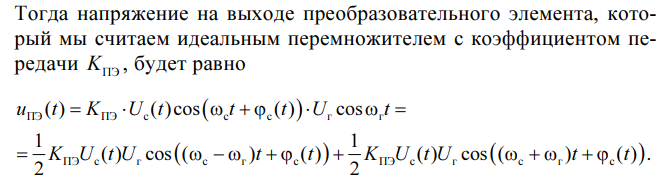

Параметры сигнала на высокой частоте
Амплитуда несущей: 1 В
Амплитуда боковых составляющих: 0.2 В
Нижняя боковая частота: 1037.0 кГц
Верхняя боковая частота: 1063.0 кГц
Центральная частота: 1050.0 кГц

Параметры сигнала на низкой частоте
Амплитуда несущей: 1 В
Амплитуда боковых составляющих: 0.2 В
Нижняя боковая частота: 87.0 кГц
Верхняя боковая частота: 113.0 кГц
Центральная частота: 100.0 кГц


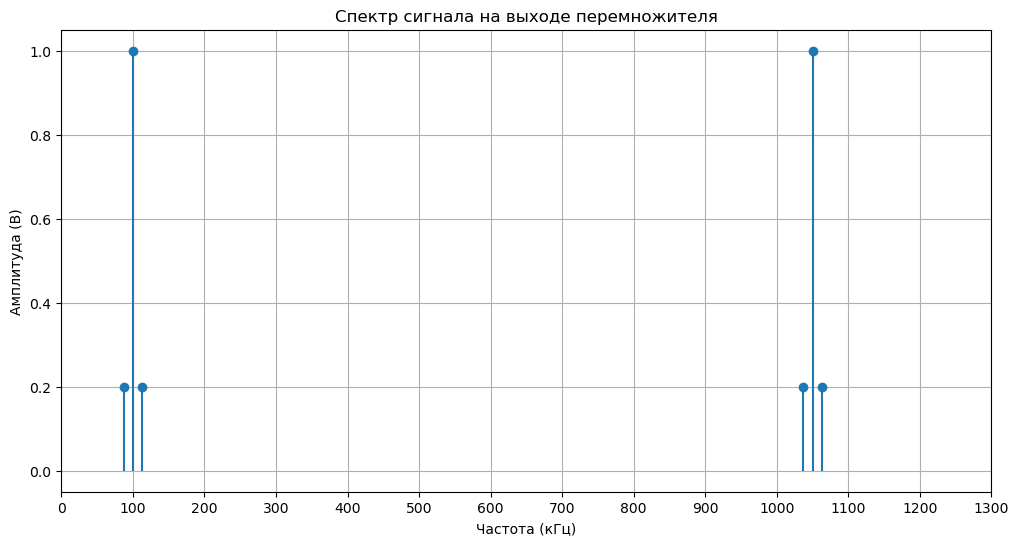

In [20]:
# Заданные параметры
# U_0 = 0.6
# f_s_1 = 485e3 + 585e3
# f_s_2 = 585e3 - 485e3
# m = 0.5
# F_m = 12e3

# #Cерега
# U_0 = 0.65
# f_s_1 = 540e3 + 640e3
# f_s_2 = 640e3 - 540e3
# m = 0.5
# F_m = 9e3

U_0 = 1
f_s_1 = 475e3 + 575000
f_s_2 = 575000 - 475e3
m = 0.4
F_m = 13e3
f_p = 100e3


# Параметры спектра
carrier_amplitude = U_0  # Амплитуда несущей
sideband_amplitude = m * U_0 / 2  # Амплитуда боковых составляющих
spectrum_width = 2 * F_m  # Ширина спектра

lower_sideband_freq_1 = f_s_1 - F_m  # Нижняя боковая частота
upper_sideband_freq_1 = f_s_1 + F_m  # Верхняя боковая частота

lower_sideband_freq_2 = f_s_2 - F_m  # Нижняя боковая частота
upper_sideband_freq_2 = f_s_2 + F_m  # Верхняя боковая частота

# Вывод параметров
print ("Параметры сигнала на высокой частоте")
print(f"Амплитуда несущей: {carrier_amplitude} В")
print(f"Амплитуда боковых составляющих: {sideband_amplitude} В")
print(f"Нижняя боковая частота: {lower_sideband_freq_1 / 1e3} кГц")
print(f"Верхняя боковая частота: {upper_sideband_freq_1 / 1e3} кГц")
print(f"Центральная частота: {f_s_1 / 1e3} кГц")
print()
print ("Параметры сигнала на низкой частоте")
print(f"Амплитуда несущей: {carrier_amplitude} В")
print(f"Амплитуда боковых составляющих: {sideband_amplitude} В")
print(f"Нижняя боковая частота: {lower_sideband_freq_2 / 1e3} кГц")
print(f"Верхняя боковая частота: {upper_sideband_freq_2 / 1e3} кГц")
print(f"Центральная частота: {f_s_2 / 1e3} кГц")

# Построение спектра
frequencies = [lower_sideband_freq_1, f_s_1, upper_sideband_freq_1, lower_sideband_freq_2, f_s_2, upper_sideband_freq_2]
amplitudes = [sideband_amplitude, carrier_amplitude, sideband_amplitude, sideband_amplitude, carrier_amplitude, sideband_amplitude]

new_xticks = np.arange(0, 1400, 100)  # Задаем метки от 0 до 42 мкс с шагом 2 мкс

plt.figure(figsize=(12, 6))
plt.stem([f / 1e3 for f in frequencies], amplitudes, basefmt=" ")
plt.title("Спектр сигнала на выходе перемножителя")
plt.xlabel("Частота (кГц)")
plt.ylabel("Амплитуда (В)")
plt.grid(True)
plt.xticks(new_xticks)
plt.show()



### Расчёт спектров на выходе фильтра для разных типов радиоприёмников (супергетеродинный, инфрадинный, гомодинный). Верхняя настройка гетеродина

- С помощью фильтра нам нужно выделить сигнал, который находится на промежуточной частоте 100 кГц (Для супергетеродинного радиоприёмника). 

- В случае инфрадинного радиоприёмника нужно выделить сигнал на частоте fп.инф = 1.07e+06 (fc + fгетеродина.верхняя)

- 	Для гомодинного радиоприёмника промежуточная частота равна fп = 0 Гц


В случае идеального фильтра мы полностью уберём спектр сигнала на не промежуточной частоте.
Представим такую ситуацию и построим качетсвенный вид спектра на выходе фильтра для нескольких радиоприёмников.

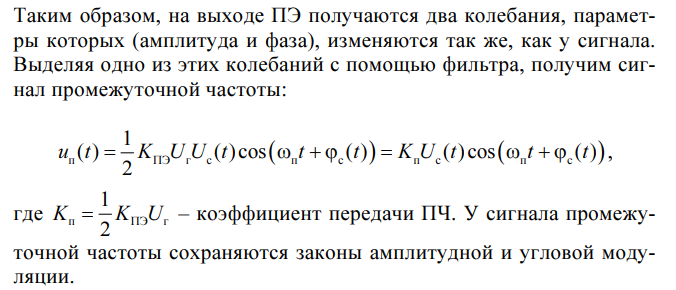

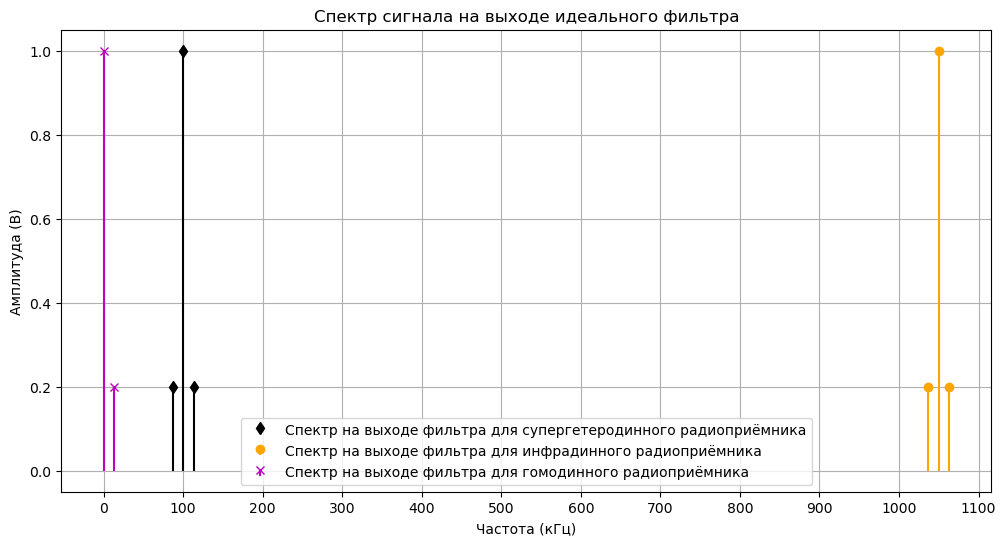

In [21]:
# Построение спектра супергетероди
frequencies_1 = [lower_sideband_freq_2, f_s_2, upper_sideband_freq_2]
amplitudes_1 = [sideband_amplitude, carrier_amplitude, sideband_amplitude]

# Построение спектра инфрадин
frequencies_2 = [lower_sideband_freq_1, f_s_1, upper_sideband_freq_1]
amplitudes_2 = [sideband_amplitude, carrier_amplitude, sideband_amplitude]

# Построение спектра гомодина
frequencies_3 = [0, F_m]
amplitudes_3 = [carrier_amplitude, sideband_amplitude]

new_xticks = np.arange(0, 1200, 100)  # Задаем метки от 0 до 42 мкс с шагом 2 мкс

plt.figure(figsize=(12, 6))
plt.stem([f / 1e3 for f in frequencies_1], amplitudes_1, basefmt=" ", markerfmt = 'd',linefmt = 'black', label="Спектр на выходе фильтра для супергетеродинного радиоприёмника")
plt.stem([f / 1e3 for f in frequencies_2], amplitudes_2, basefmt=" ", markerfmt = 'o', linefmt = 'orange', label="Спектр на выходе фильтра для инфрадинного радиоприёмника")
plt.stem([f / 1e3 for f in frequencies_3], amplitudes_3, basefmt=" ", markerfmt = 'x', linefmt = 'm', label="Спектр на выходе фильтра для гомодинного радиоприёмника")
plt.title("Спектр сигнала на выходе идеального фильтра")
plt.xlabel("Частота (кГц)")
plt.ylabel("Амплитуда (В)")
plt.grid(True)
plt.xticks(new_xticks)
plt.legend()
plt.show()

### Инфрадинный и гомодинный радиоприёмник

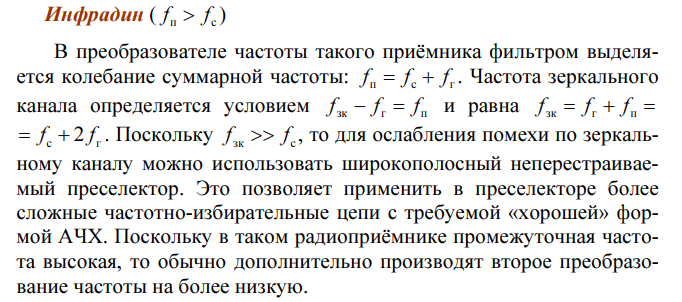

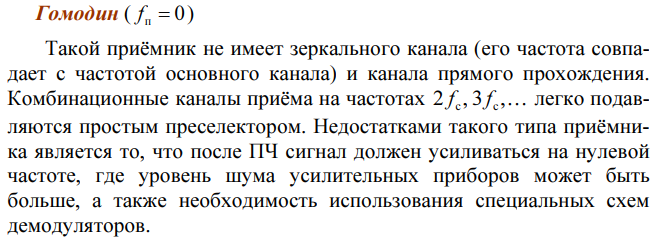